In [32]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import sidetable

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Estandarización variables numéricas y Codificación variables categóricas
# ------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Para separar los datos en train y test
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [33]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 25

# Pair Programming Preprocesado

Usando el mismo dataset que usatéis ayer, los objetivos de los ejercicios de hoy son:

Estandarizar las variables numéricas de vuestro set de datos

Codificar las variables categóricas. Recordad que tendréis que tener en cuenta si vuestras variables tienen orden o no.

Chequear si vuestros datos están balanceados. En caso de que no lo estén utilizad algunas de las herramientas aprendidas en la lección para balancearlos.

Guardad el dataframe con los cambios que habéis aplicado para utilizarlo en la siguiente lección.

In [34]:
# cargamos el dataframe

df = pd.read_pickle('datos/Invistico_Airline_v2.pkl')
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0


## Estandarización

In [35]:
# creamos un dataframe de las variables numéricas

df_num = df.select_dtypes(include=np.number)
df_num.head(2)

,Age,Flight Distance,Departure Delay in Minutes
0,65,265,0
1,47,2464,310


In [36]:
# estandarizamos los datos usando el StandardScaler de la libreria de Sklearn

scaler = StandardScaler()
scaler.fit(df_num)
datos_estandarizados = scaler.transform(df_num)
df_datos_estandarizados = pd.DataFrame(datos_estandarizados, columns = df_num.columns)

In [37]:
df_datos_estandarizados.head(10)

,Age,Flight Distance,Departure Delay in Minutes
0,1.691495,-1.671090,-0.386036
1,0.500825,0.470348,7.786328
2,-1.615922,0.152882,-0.386036
3,1.360753,-1.322461,-0.386036
4,2.022237,-1.584420,-0.386036
5,-0.623697,-0.084731,-0.386036
6,1.757643,-1.708095,0.062126
7,-1.946664,-0.164585,-0.386036
8,1.096160,-1.858064,-0.386036
9,-1.152884,-0.413884,0.404838


In [38]:
df.drop(columns=df_datos_estandarizados.columns, inplace=True)

In [39]:
# lo unimos al dataframe original 

df = pd.concat([df, df_datos_estandarizados], axis = 1, join='inner')

# chequeamos que esta todo bien
df.head()

,satisfaction,Gender,Customer Type,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Age,Flight Distance,Departure Delay in Minutes
0,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,2,2,4,2,3,3,0,3,5,3,2,1.691495,-1.671090,-0.386036
1,satisfied,Male,Loyal Customer,Personal Travel,Business,0,0,0,3,0,2,2,3,4,4,4,2,3,2,0.500825,0.470348,7.786328
2,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,2,0,2,2,3,3,4,4,4,2,-1.615922,0.152882,-0.386036
3,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,3,4,3,1,1,0,1,4,1,3,1.360753,-1.322461,-0.386036
4,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,4,3,4,2,2,0,2,4,2,5,2.022237,-1.584420,-0.386036


# Encoding

In [40]:
# examinamos la mediana de las variables numericas por satisfaccion

df.groupby("satisfaction").median()

,Age,Flight Distance,Departure Delay in Minutes
satisfaction,,,
dissatisfied,-0.226807,-0.026302,-0.386036
satisfied,0.170083,-0.093496,-0.386036


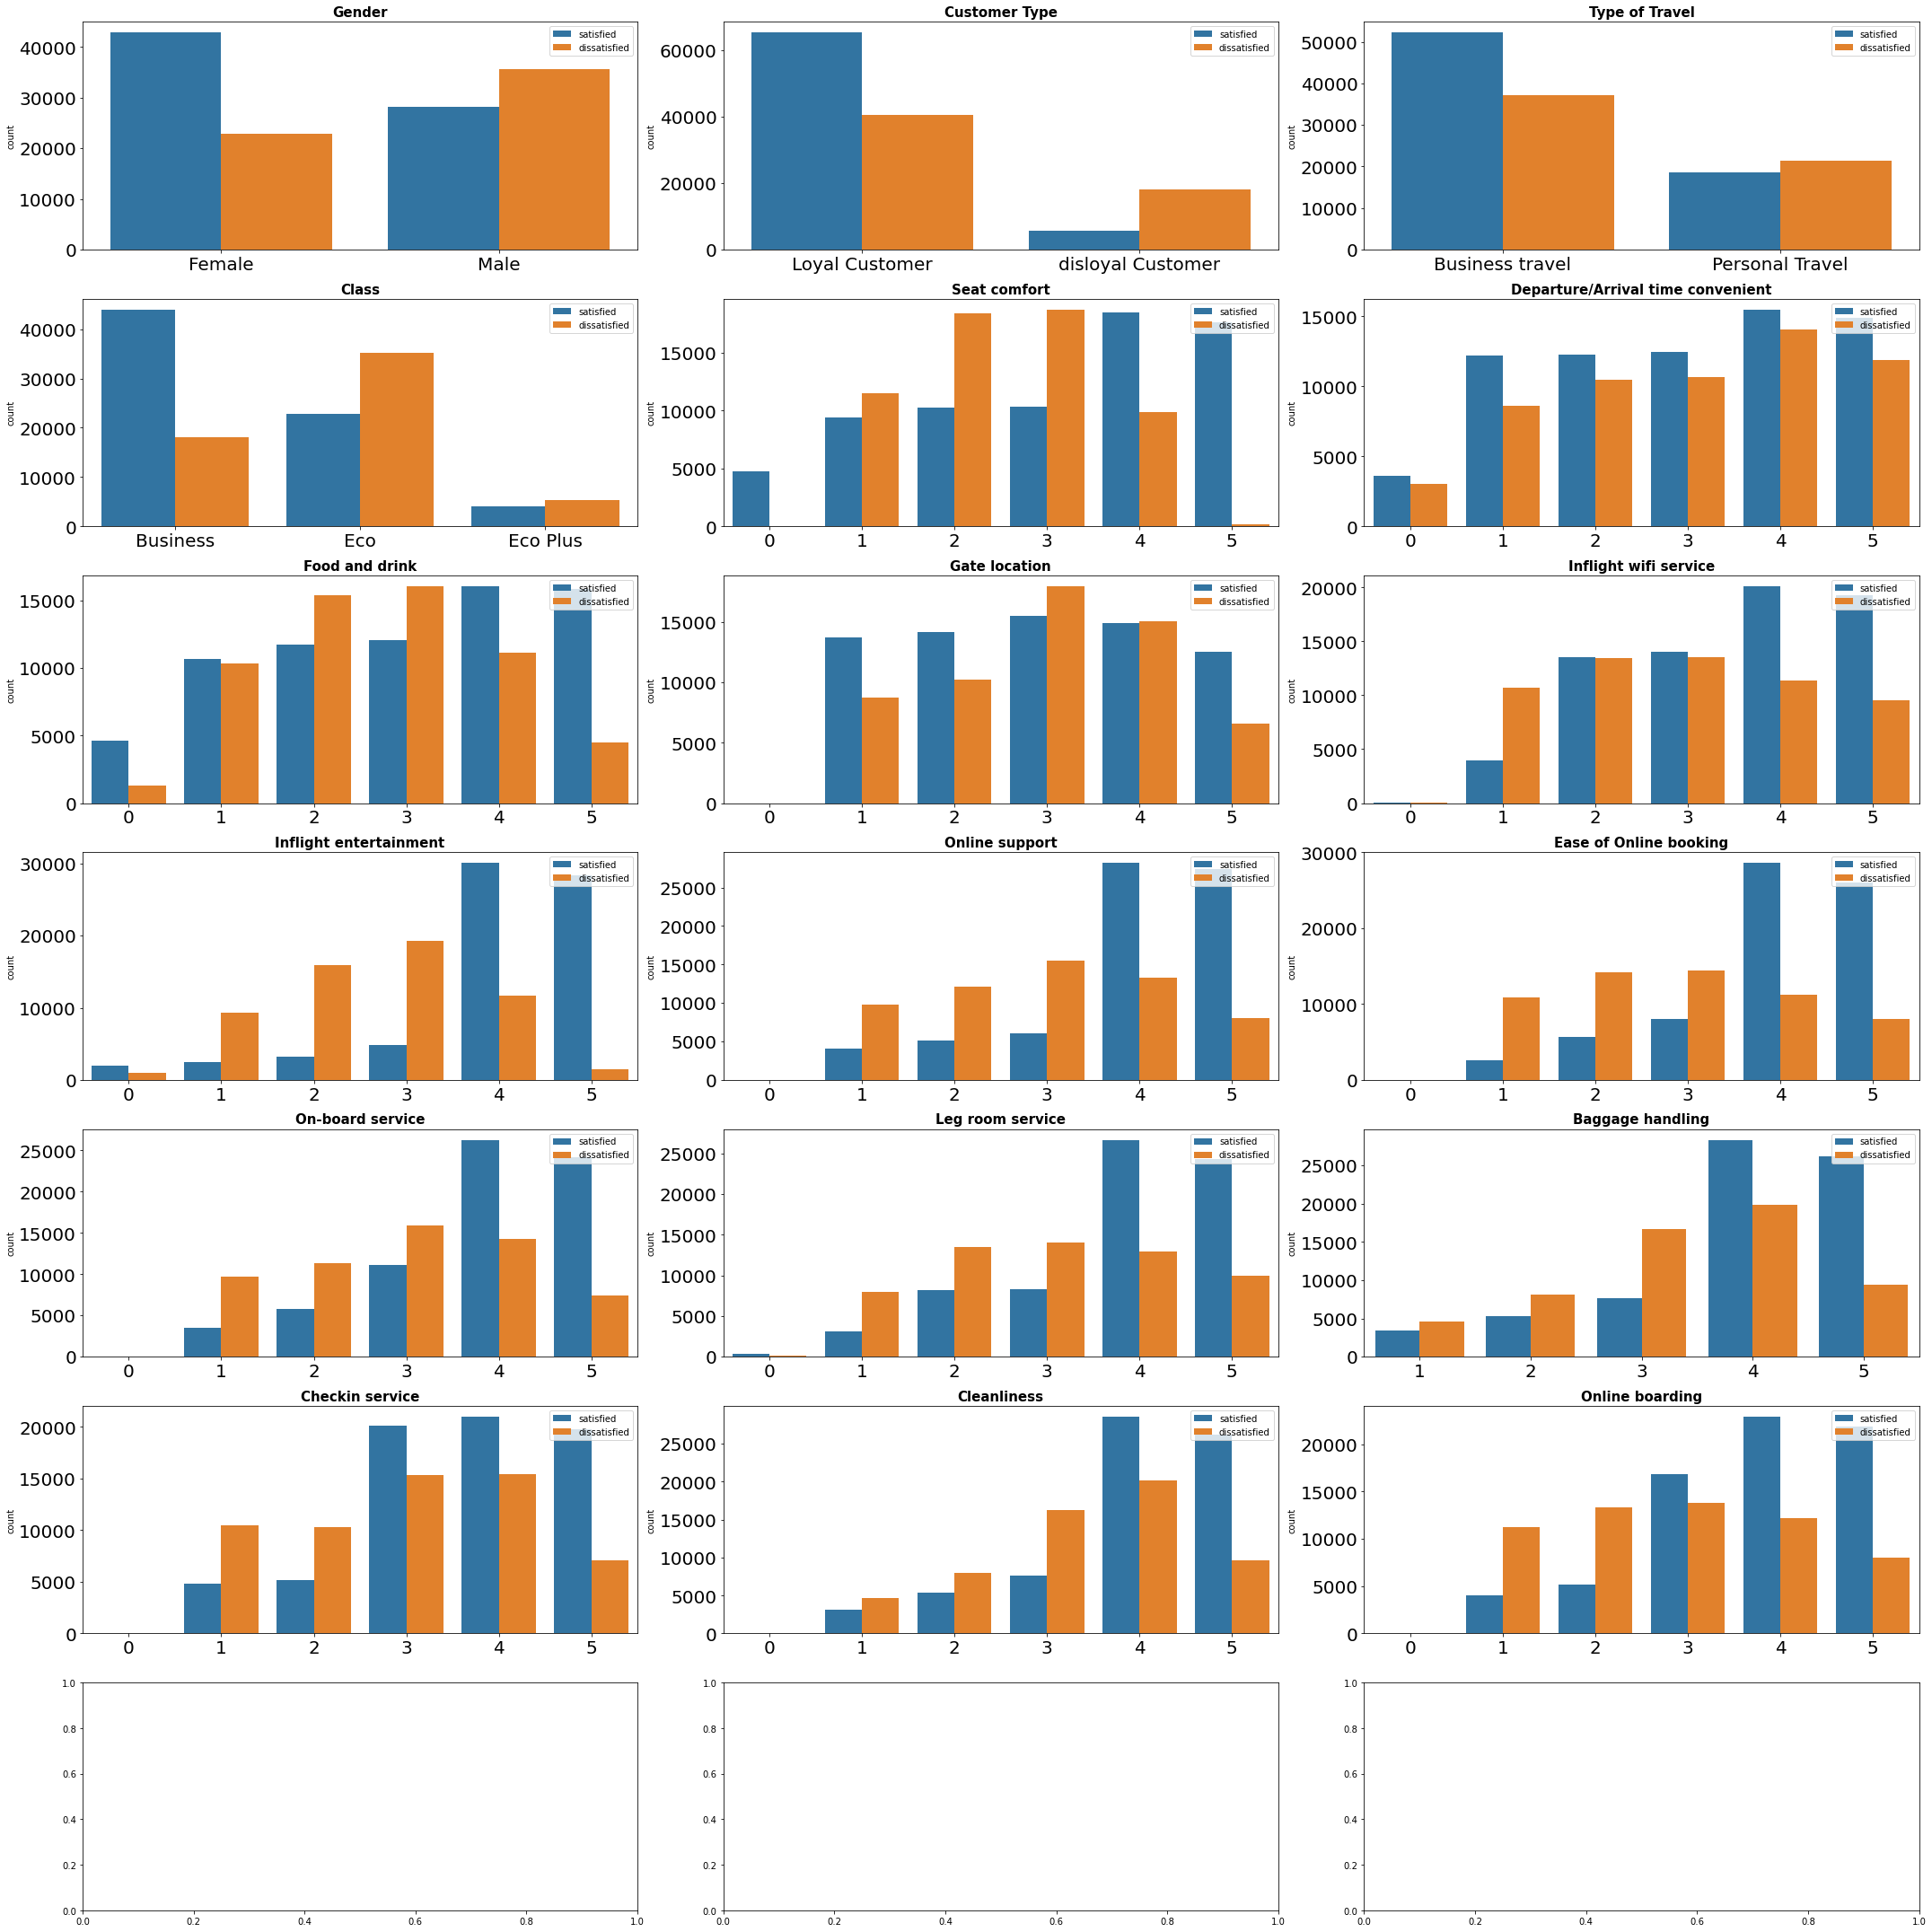

In [41]:
# creamos countplots de las variables categoricas contra la variable respuesta para determinar 
# cuales son variables ordinales y cuales son nominales

fig, axes = plt.subplots(nrows = 7, ncols = 3, figsize = (30, 30))

axes = axes.flat

df_countplot = df.drop(['Departure Delay in Minutes', 'Age', 'Flight Distance', 'satisfaction'], axis=1)

for i, colum in enumerate(df_countplot.columns): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "satisfaction", 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")

fig.tight_layout();

En nuestro caso, nos interesa conocer qué hace que los clientes no estén satisfechos, para así poder modificar estos factores y aumentar la satisfacción general. Intentaremos que esto se refleje en nuestro encoding.

In [42]:
columnas_categoria

['Gender',
 'Customer Type',
 'Type of Travel',
 'Class',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding']

In [43]:
# aplicamos un map para codificar la variable respuesta 

df['satisfaction'] = df['satisfaction'].map({'satisfied': 0, 'dissatisfied': 1})
df['satisfaction'].unique()

array([0, 1])

In [44]:
# creamos un dataframe de las variables categoricas

df_cat = df.select_dtypes(exclude=np.number)
df_cat.head()

,Gender,Customer Type,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,Female,Loyal Customer,Personal Travel,Eco,0,0,0,2,2,4,2,3,3,0,3,5,3,2
1,Male,Loyal Customer,Personal Travel,Business,0,0,0,3,0,2,2,3,4,4,4,2,3,2
2,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,2,0,2,2,3,3,4,4,4,2
3,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,3,4,3,1,1,0,1,4,1,3
4,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,4,3,4,2,2,0,2,4,2,5


In [45]:
# creamos una función acepta un dataframe de variables categoricas, calcula las proporciones de clientes satisfechos e insatisfechos
# por categória, y crea valores para codificar segun la proporción de clientes insatisfechos
# devuelve un diccionario que permite aplicar el metodo map()

def encoding(dataframe_categorica):
    
    dicc_encoding = {}

    for col in dataframe_categorica.columns:
        
        df_group = df.groupby([col,'satisfaction']).count()
        df_group = round(df_group.div(df_group.sum(level=0), level=0)["Age"] * 100, 2)
        df_group = pd.DataFrame(df_group)
        df_group.columns = ['% dissatisfied']
        df_group.reset_index(inplace=True)
        
        df_group = df_group[df_group['satisfaction'] == 1].sort_values(by='% dissatisfied', ascending=True)
        
        if df_group.iloc[0,2] > 5:
            df_group['encoding'] = round(df_group['% dissatisfied']/df_group.iloc[0,2], 3)
        elif df_group.iloc[1,2] > 5:
            df_group['encoding'] = round(df_group['% dissatisfied']/df_group.iloc[1,2], 3)  
        elif df_group.iloc[2,2] > 5:
            df_group['encoding'] = round(df_group['% dissatisfied']/df_group.iloc[2,2], 3)
        else:
            df_group['encoding'] = round(df_group['% dissatisfied']/df_group.iloc[3,2], 3)

        dicc_encoding[col] = dict(zip(df_group[col].unique(), df_group['encoding'].unique()))
        
    return dicc_encoding

In [46]:
# aplicamos el metodo para crear el diccionario de valores para el encoding

diccionario_encoding = encoding(df_cat)
diccionario_encoding

{'Gender': {'Female': 1.0, 'Male': 1.606},
 'Customer Type': {'Loyal Customer': 1.0, 'disloyal Customer': 1.981},
 'Type of Travel': {'Business travel': 1.0, 'Personal Travel': 1.282},
 'Class': {'Business': 1.0, 'Eco Plus': 1.971, 'Eco': 2.085},
 'Seat comfort': {0: 0.006, 5: 0.023, 4: 1.0, 1: 1.577, 2: 1.844, 3: 1.849},
 'Departure/Arrival time convenient': {1: 1.0,
  5: 1.072,
  0: 1.106,
  2: 1.111,
  3: 1.112,
  4: 1.149},
 'Food and drink': {5: 1.0, 0: 1.002, 4: 1.863, 1: 2.235, 2: 2.58, 3: 2.598},
 'Gate location': {0: 0.0, 5: 1.0, 1: 1.129, 2: 1.217, 4: 1.458, 3: 1.558},
 'Inflight wifi service': {5: 1.0,
  4: 1.093,
  3: 1.482,
  2: 1.504,
  0: 1.674,
  1: 2.211},
 'Inflight entertainment': {5: 0.171,
  4: 1.0,
  0: 1.211,
  1: 2.818,
  3: 2.859,
  2: 2.962},
 'Online support': {5: 1.0, 4: 1.409, 2: 3.101, 1: 3.106, 3: 3.163, 0: 4.409},
 'Ease of Online booking': {5: 1.0,
  4: 1.203,
  3: 2.742,
  2: 3.043,
  1: 3.443,
  0: 4.264},
 'On-board service': {5: 1.0,
  4: 1.505,
  3

- Podemos ver que para la variable de 'Departure/Arrival time convenient' apenas hay diferencia entre el % de clientes insatisfechos por categoría, así vamos a considerarlo como variable categórica nominal.

In [47]:
diccionario_encoding.pop('Departure/Arrival time convenient')

{1: 1.0, 5: 1.072, 0: 1.106, 2: 1.111, 3: 1.112, 4: 1.149}

In [48]:
# creamos una copia del dataframe para aplicar en encoding para averiguar que funciona

df_encod = df.copy()

In [49]:
# aplicamos el map() al resto de las columnas categoricas

for k, v in diccionario_encoding.items():
    df_encod[k] = df_encod[k].map(v)

In [50]:
df_encod.head()

,satisfaction,Gender,Customer Type,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Age,Flight Distance,Departure Delay in Minutes
0,0,1.000,1.0,1.282,2.085,0.006,0,1.002,1.217,1.504,1.000,3.101,2.742,2.517,1.056,2.592,1.000,2.542,2.679,1.691495,-1.671090,-0.386036
1,0,1.606,1.0,1.282,1.000,0.006,0,1.002,1.558,1.674,2.962,3.101,2.742,1.505,1.121,1.558,2.526,2.542,2.679,0.500825,0.470348,7.786328
2,0,1.000,1.0,1.282,2.085,0.006,0,1.002,1.558,1.504,1.211,3.101,3.043,2.517,2.155,1.558,1.601,1.540,2.679,-1.615922,0.152882,-0.386036
3,0,1.000,1.0,1.282,2.085,0.006,0,1.002,1.558,1.482,1.000,3.163,3.443,3.134,1.056,2.185,1.601,2.225,1.679,1.360753,-1.322461,-0.386036
4,0,1.000,1.0,1.282,2.085,0.006,0,1.002,1.558,1.093,2.859,1.409,3.043,2.813,1.056,2.285,1.601,2.218,1.000,2.022237,-1.584420,-0.386036


In [51]:
# comprobamos que haya funcionado bien con los value counts del dataframe original y el dataframe codificado

for col in df_cat.columns:
    print(f'Value counts original de {col}')
    print(df[col].value_counts())
    print('------------')
    print(f'Value counts encoding de {col}')
    print(df_encod[col].value_counts())
    print('------------')
    print('------------')

Value counts original de Gender
Female    65703
Male      63784
Name: Gender, dtype: int64
------------
Value counts encoding de Gender
1.0      65703
1.606    63784
Name: Gender, dtype: int64
------------
------------
Value counts original de Customer Type
Loyal Customer       105773
disloyal Customer     23714
Name: Customer Type, dtype: int64
------------
Value counts encoding de Customer Type
1.0      105773
1.981     23714
Name: Customer Type, dtype: int64
------------
------------
Value counts original de Type of Travel
Business travel    89445
Personal Travel    40042
Name: Type of Travel, dtype: int64
------------
Value counts encoding de Type of Travel
1.0      89445
1.282    40042
Name: Type of Travel, dtype: int64
------------
------------
Value counts original de Class
Business    61990
Eco         58117
Eco Plus     9380
Name: Class, dtype: int64
------------
Value counts encoding de Class
1.0      61990
2.085    58117
1.971     9380
Name: Class, dtype: int64
------------


### Encoding del variable categórica nominal

In [52]:
# creamos la instancia del metodo One-Hot Encoder para la variable categorica nominal

oh = OneHotEncoder()

In [53]:
# lo ajustamos a la columna

df_transformados = oh.fit_transform(df[['Departure/Arrival time convenient']])

In [54]:
# aplicamos el metodo y creamos un dataframe de las nuevas columnas

oh_df = pd.DataFrame(df_transformados.toarray())
oh_df.columns = oh.get_feature_names_out()

In [55]:
# juntamos las nuevas columnas con el dataframe codificado

df_final = pd.concat([df_encod, oh_df], axis=1)

In [56]:
# eliminamos la columna original

df_final.drop('Departure/Arrival time convenient', axis=1, inplace=True)

In [57]:
df_final.head(2)

,satisfaction,Gender,Customer Type,Type of Travel,Class,Seat comfort,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Age,Flight Distance,Departure Delay in Minutes,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,Departure/Arrival time convenient_4,Departure/Arrival time convenient_5
0,0,1.000,1.0,1.282,2.085,0.006,1.002,1.217,1.504,1.000,3.101,2.742,2.517,1.056,2.592,1.000,2.542,2.679,1.691495,-1.671090,-0.386036,1.0,0.0,0.0,0.0,0.0,0.0
1,0,1.606,1.0,1.282,1.000,0.006,1.002,1.558,1.674,2.962,3.101,2.742,1.505,1.121,1.558,2.526,2.542,2.679,0.500825,0.470348,7.786328,1.0,0.0,0.0,0.0,0.0,0.0


## Balanceo

In [58]:
df.stb.freq(['satisfaction'])

,satisfaction,count,percent,cumulative_count,cumulative_percent
0,0,70882,54.74063,70882,54.74063
1,1,58605,45.25937,129487,100.00000


- como nuestra variable respuesta está bastante balanceada, no hace falta hacer un downsampling o upsampling

In [59]:
# guardamos los resultados

df_final.to_pickle('datos/Invistico_Airline_v4_enco.pkl')